In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [77]:
df = pd.read_csv("sonar.csv", names =range(0,61), header = 0)

In [78]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [79]:
df1 = pd.DataFrame(data=df)

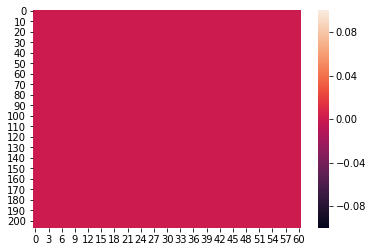

In [80]:
sns.heatmap(df.isnull())

In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns
df1.hist()
pyplot.show()

In [ ]:
scatter_matrix(df1)
pyplot.show()

In [81]:
dfcor = df.corr()
dfcor

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.736104,0.571706,0.490853,0.345744,0.238824,0.262095,0.356312,0.356822,0.318440,...,0.255916,0.354348,0.310964,0.324101,0.311683,0.224784,0.319663,0.368413,0.357611,0.346302
1,0.736104,1.000000,0.779915,0.607297,0.419877,0.332319,0.279328,0.334747,0.317929,0.270787,...,0.320931,0.435641,0.346259,0.384526,0.380188,0.263959,0.282822,0.353061,0.352260,0.359010
2,0.571706,0.779915,1.000000,0.782662,0.546365,0.346271,0.190628,0.237974,0.253615,0.219641,...,0.238392,0.395121,0.333124,0.367687,0.289754,0.289393,0.383945,0.334122,0.425100,0.374256
3,0.490853,0.607297,0.782662,1.000000,0.729338,0.352901,0.248713,0.248131,0.252048,0.238136,...,0.177103,0.372377,0.363470,0.337358,0.284345,0.287941,0.349411,0.345537,0.421410,0.399262
4,0.345744,0.419877,0.546365,0.729338,1.000000,0.597438,0.334831,0.203590,0.176522,0.183240,...,0.115023,0.269478,0.316412,0.204402,0.197098,0.197829,0.218004,0.238749,0.290793,0.255220
5,0.238824,0.332319,0.346271,0.352901,0.597438,1.000000,0.703624,0.471942,0.329145,0.288639,...,0.172210,0.252509,0.162255,0.164595,0.133351,0.168382,0.163433,0.204027,0.220678,0.178027
6,0.262095,0.279328,0.190628,0.248713,0.334831,0.703624,1.000000,0.675612,0.469490,0.425675,...,0.182929,0.147402,0.047982,0.161645,0.196456,0.171433,0.183382,0.242632,0.183279,0.224536
7,0.356312,0.334747,0.237974,0.248131,0.203590,0.471942,0.675612,1.000000,0.779512,0.652635,...,0.260114,0.221356,0.103418,0.233340,0.240079,0.276214,0.266743,0.287568,0.194209,0.147350
8,0.356822,0.317929,0.253615,0.252048,0.176522,0.329145,0.469490,0.779512,1.000000,0.879711,...,0.172312,0.215365,0.109029,0.199749,0.181543,0.226605,0.186347,0.232078,0.096662,0.099233
9,0.318440,0.270787,0.219641,0.238136,0.183240,0.288639,0.425675,0.652635,0.879711,1.000000,...,0.167179,0.166151,0.097689,0.146820,0.175322,0.152548,0.141211,0.212272,0.058260,0.097528


In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [83]:
df1[60]=le.fit_transform(df[60])

In [84]:
df1

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1
5,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,1
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,1
7,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,1
8,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,1
9,0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,...,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036,1


In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)

In [86]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[0.70018948, 0.42042142, 1.0529498 , ..., 0.44268846, 0.42246083,
        1.07529066],
       [0.13089402, 0.59942737, 1.71912994, ..., 0.25299833, 0.25405324,
        1.07529066],
       [0.83579208, 0.64754631, 0.48045125, ..., 0.63683361, 1.03005467,
        1.07529066],
       ...,
       [1.00042384, 0.15949749, 0.67235266, ..., 0.0382194 , 0.68112798,
        0.92998111],
       [0.0475061 , 0.09535845, 0.13434985, ..., 0.70154866, 0.34287094,
        0.92998111],
       [0.13959647, 0.06501846, 0.78685237, ..., 0.2970796 , 0.99025973,
        0.92998111]])

In [87]:
threshold = 3
print(np.where(z>3))

(array([  1,   1,   1,   1,   2,   2,   4,   4,  18,  18,  19,  20,  21,
        21,  21,  21,  21,  21,  21,  21,  32,  43,  43,  43,  64,  84,
        84,  86,  90,  90,  96,  96,  97,  97,  97,  97,  97,  97, 100,
       100, 104, 110, 110, 110, 111, 126, 126, 126, 128, 128, 128, 130,
       131, 131, 132, 132, 132, 133, 133, 133, 133, 134, 134, 134, 134,
       135, 135, 135, 135, 136, 136, 137, 137, 137, 139, 139, 139, 139,
       139, 140, 140, 141, 141, 141, 142, 142, 142, 143, 144, 144, 145,
       145, 145, 145, 145, 145, 145, 145, 145, 146, 146, 146, 146, 146,
       146, 146, 146, 160, 183, 185, 185, 185], dtype=int64), array([ 8,  9, 11, 56, 38, 39, 13, 14,  4,  7,  5, 37, 38, 39, 40, 41, 46,
       47, 48, 49, 49, 39, 42, 43, 58,  1,  2, 56,  5,  6, 58, 59,  0,  1,
        2,  3,  4, 59, 12, 57, 55,  2,  3,  4, 57, 13, 54, 57,  0, 12, 53,
        0,  7,  8,  8,  9, 52,  0,  6,  7,  8,  7,  8, 53, 55,  0,  7,  8,
       51,  9, 10,  2, 47, 51, 45, 46, 48, 49, 50, 45, 59, 53

In [88]:
df2 = df[(z < 3).all(axis=1)]

In [89]:
x = df2.iloc[:,0:-1]
x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
5,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053
7,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0061,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022
8,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0118,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040
9,0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,...,0.0062,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036
10,0.0123,0.0309,0.0169,0.0313,0.0358,0.0102,0.0182,0.0579,0.1122,0.0835,...,0.0188,0.0133,0.0265,0.0224,0.0074,0.0118,0.0026,0.0092,0.0009,0.0044
11,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0174,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032
12,0.0090,0.0062,0.0253,0.0489,0.1197,0.1589,0.1392,0.0987,0.0955,0.1895,...,0.0187,0.0059,0.0095,0.0194,0.0080,0.0152,0.0158,0.0053,0.0189,0.0102


In [90]:
x = pca.fit_transform(x)

In [91]:
x.shape

(167, 10)

In [92]:
y = df2.iloc[:,-1]
y

0      1
3      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
33     1
34     1
35     1
36     1
37     1
      ..
175    0
176    0
177    0
178    0
179    0
180    0
181    0
182    0
184    0
186    0
187    0
188    0
189    0
190    0
191    0
192    0
193    0
194    0
195    0
196    0
197    0
198    0
199    0
200    0
201    0
202    0
203    0
204    0
205    0
206    0
Name: 60, Length: 167, dtype: int32

In [93]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9
0,-1.095521,0.924796,0.770004,-0.489682,0.098794,0.366121,-0.157620,-0.309537,0.220956,-0.283547
1,-0.057621,0.302695,0.584591,-0.450973,0.122968,0.283027,0.162165,0.087974,0.477268,-0.201895
2,-0.219841,0.467571,-0.176854,0.266075,0.298315,0.191714,-0.099861,0.479604,0.535409,0.235754
3,-0.565020,-0.121989,0.069011,0.468691,0.497908,0.037829,0.064053,-0.317900,-0.134161,-0.163618
4,-0.344173,-0.055402,0.061917,0.410591,0.289233,-0.565306,0.357036,-0.324420,0.032011,0.106046
5,0.057748,-0.843990,0.145599,0.298887,-0.289123,-0.093747,-0.026525,0.239435,0.248551,0.128873
6,1.240164,-0.032127,0.180625,0.010949,-0.335052,-0.044811,0.024326,-0.016601,0.103531,0.160454
7,-0.024355,-0.192732,0.107658,0.330737,0.142822,-0.233112,0.607472,-0.158421,0.034939,0.227360
8,-0.942029,0.212229,0.030598,0.745275,-0.180946,-0.292546,-0.002800,0.094809,0.207460,-0.177998
9,0.442051,0.305180,-0.016131,0.059563,0.192500,0.371647,-0.084726,-0.094051,-0.050208,-0.135700


In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scale = StandardScaler()
x = scale.fit_transform(x)



In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.22,random_state=43)

In [97]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
score =cross_val_score(lr,x,y,cv=5,scoring="accuracy")
print("score;",score)

score; [0.44117647 0.91176471 0.54545455 0.96969697 0.54545455]


In [98]:
print(score.mean())

0.6827094474153298


In [99]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(lr,x,y,cv=5)

In [100]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [101]:
print(confusion_matrix(y,y_pred))

[[52 32]
 [21 62]]


In [102]:
lr.fit(x_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
lr.score(x_train,y_train)

0.7307692307692307

In [104]:
predlr = lr.predict(x_test)

In [105]:
LRAS = accuracy_score(y_test,predlr)
LRAS

0.918918918918919

In [106]:
LRCM = confusion_matrix(y_test,predlr)
LRCM

array([[12,  2],
       [ 1, 22]], dtype=int64)

In [107]:
LRCR = classification_report(y_test,predlr)
LRCR

'              precision    recall  f1-score   support\n\n           0       0.92      0.86      0.89        14\n           1       0.92      0.96      0.94        23\n\n    accuracy                           0.92        37\n   macro avg       0.92      0.91      0.91        37\nweighted avg       0.92      0.92      0.92        37\n'

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [109]:
mnb = GaussianNB()
score =cross_val_score(mnb,x,y,cv=5,scoring="accuracy")
print("score;",score)

score; [0.5        0.79411765 0.33333333 0.75757576 0.39393939]


In [110]:
GBA = "mean score",score.mean()
GBA

('mean score', 0.5557932263814617)

In [111]:
pred_GB = cross_val_predict(mnb,x,y,cv=5)

In [142]:
GBAS = accuracy_score(y,pred_GB)
GBAS

0.5568862275449101

In [140]:
GBCM = confusion_matrix(y,pred_GB)
GBCM

array([[37, 47],
       [27, 56]], dtype=int64)

In [139]:
GBCR = classification_report(y,pred_GB)
GBCR

'              precision    recall  f1-score   support\n\n           0       0.58      0.44      0.50        84\n           1       0.54      0.67      0.60        83\n\n    accuracy                           0.56       167\n   macro avg       0.56      0.56      0.55       167\nweighted avg       0.56      0.56      0.55       167\n'

In [118]:
print(pred_GB)

[1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1]


In [119]:
print(confusion_matrix(y,y_pred))

[[52 32]
 [21 62]]


In [120]:
sv = SVC(kernel="poly")
score =cross_val_score(sv,x,y,cv=5)
print(score)


[0.5        0.79411765 0.60606061 0.87878788 0.54545455]


In [121]:
SV = score.mean()

In [122]:
y_pred = cross_val_predict(sv,x,y,cv=5)

In [123]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [124]:
SVCM = confusion_matrix(y,y_pred)

In [125]:
SVCR = classification_report(y,y_pred)

In [126]:
dtc = DecisionTreeClassifier(criterion='gini')

In [127]:
score = cross_val_score(dtc,x,y,cv=5,scoring="accuracy")
print(score)

[0.58823529 0.73529412 0.66666667 0.84848485 0.75757576]


In [128]:
DTA = score.mean()

In [129]:
y_pred = cross_val_predict(dtc,x,y,cv=5)

In [130]:
print(y_pred)

[1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]


In [131]:
DTCM = confusion_matrix(y,y_pred)
DTCM

array([[62, 22],
       [26, 57]], dtype=int64)

In [132]:
DTCR = classification_report(y,y_pred)
DTCR

'              precision    recall  f1-score   support\n\n           0       0.70      0.74      0.72        84\n           1       0.72      0.69      0.70        83\n\n    accuracy                           0.71       167\n   macro avg       0.71      0.71      0.71       167\nweighted avg       0.71      0.71      0.71       167\n'

In [133]:
knn  = KNeighborsClassifier()
score =cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print(score)

[0.58823529 0.61764706 0.54545455 0.72727273 0.51515152]


In [134]:
KNA = score.mean()
KNA

0.5987522281639929

In [135]:
y_pred = cross_val_predict(knn,x,y,cv=5)

In [136]:
print(y_pred)

[0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0
 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]


In [137]:
KNCM = confusion_matrix(y,y_pred)
KNCM

array([[58, 26],
       [41, 42]], dtype=int64)

In [138]:
KNCR = classification_report(y,y_pred)
KNCR

'              precision    recall  f1-score   support\n\n           0       0.59      0.69      0.63        84\n           1       0.62      0.51      0.56        83\n\n    accuracy                           0.60       167\n   macro avg       0.60      0.60      0.60       167\nweighted avg       0.60      0.60      0.60       167\n'

In [146]:
dict = {'model':'scores','Linear regression':[LRAS,LRCM,LRCR],'GaussianNB':[GBAS,GBCM,GBCR],'Support Vector Machine':[SV,SVCM,SVCR],'Decision tree':[DTA,DTCM,DTCR],'KNN':[KNA,KNCM,KNCR]}

In [150]:
df4 = pd.DataFrame([dict])

In [151]:
df4

,Decision tree,GaussianNB,KNN,Linear regression,Support Vector Machine,model
0,"[0.7192513368983958, [[62, 22], [26, 57]], ...","[0.5568862275449101, [[37, 47], [27, 56]], ...","[0.5987522281639929, [[58, 26], [41, 42]], ...","[0.918918918918919, [[12, 2], [1, 22]], ...","[0.6648841354723707, [[65, 19], [37, 46]], ...",scores


In [152]:
from sklearn.externals import joblib
joblib.dump(lr,'Project8_Sonar.pkl')

['Project8_Sonar.pkl']

In [153]:
func = lambda x: return x
print(func(2))

SyntaxError: invalid syntax (<ipython-input-153-3de814d834e6>, line 1)

In [154]:
a = 3

b = 6

a,b = b,a

output = "{} {}".format(a, b)

print(output)

6 3


In [155]:
def printLine(text):
  print(text, 'is awesome.')
 
printLine('Python')

Python is awesome.


In [157]:
var = "Machine Learning"

var[5] = 'X'

print(var)

TypeError: 'str' object does not support item assignment

In [158]:
country_counter = {}

def addone(country):

    if country in country_counter:

         country_counter[country] += 1

    else:

         country_counter[country] = 1

In [159]:
addone('China')

addone('Japan')

addone('china')

addone('Japan')

print(len(country_counter))

3


In [167]:
class Vehicle:
    Type = 'Bus' #Line 2

def __init__(self, name): 
    self.Name = name #Line 4

def Show(self): 
    print (self.Name,Vehicle.Type )#Line 6


In [170]:
V1=Vehicle("Volvo")

V1.Show()

Vehicle.Type="Car"

V2=Vehicle("Ferrari") 
V2.Show() 

V3=Vehicle("Datsun")
V3.Show()       

Vehicle.Type="Truck"         
V4=Vehicle("TATA")
V4.Show()        

TypeError: Vehicle() takes no arguments

In [186]:
def sum(Count):
    S=0

for i in Range(1,Count+1):
    S+= i
    RETURN 

NameError: name 'Range' is not defined

In [175]:
MyList = ['Rose','55','Lily','90','Moon']
for val in MyList:
    print(val)

Rose
55
Lily
90
Moon


In [178]:
for Name in ['Jack','Rick','Henry','Smith']:
    print(Name)
    if Name[0]== 'H':
        break
    else:
        print('Completed!')
        print('Welldone!')

Jack
Completed!
Welldone!
Rick
Completed!
Welldone!
Henry
